In [1]:
# Step 1: Problem Understanding and Initial Setup

# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("lung_disease_data.csv")

# Display first 5 rows to understand structure
print("📄 First 5 rows of the dataset:\n")
print(df.head())

# Display shape (rows, columns)
print("\n🔹 Dataset shape:", df.shape)

# Display column names
print("\n📋 Columns present in dataset:\n", df.columns.tolist())

# Display data types
print("\n⚙️ Data types of each column:\n")
print(df.dtypes)

# Display basic info (non-null count, dtypes)
print("\n📊 Basic Info:")
print(df.info())

# Check for missing values
print("\n❗ Missing values in each column:")
print(df.isnull().sum())

# Identify unique values in each column (useful to detect categorical data)
print("\n🔍 Unique values in each column:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Quick statistical summary of numerical columns
print("\n📈 Statistical Summary (Numerical Features):")
print(df.describe())

# Determine potential target (heuristic)
candidate_targets = [c for c in df.columns if any(k in c.lower() for k in ['target', 'label', 'diagnosis', 'disease', 'class', 'outcome'])]
if candidate_targets:
    target = candidate_targets[0]
    print(f"\n🎯 Potential Target Column Detected: {target}")
else:
    print("\n⚠️ No obvious target column found. You may need to manually specify it.")


📄 First 5 rows of the dataset:

    Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No           4.49         COPD        Therapy   
1  34.0  Female            Yes            NaN   Bronchitis        Surgery   
2  80.0    Male            Yes           1.95         COPD            NaN   
3  40.0  Female            Yes            NaN   Bronchitis     Medication   
4  43.0    Male            Yes           4.60         COPD        Surgery   

   Hospital Visits Recovered  
0             14.0       Yes  
1              7.0        No  
2              4.0       Yes  
3              1.0        No  
4              NaN       Yes  

🔹 Dataset shape: (5200, 8)

📋 Columns present in dataset:
 ['Age', 'Gender', 'Smoking Status', 'Lung Capacity', 'Disease Type', 'Treatment Type', 'Hospital Visits', 'Recovered']

⚙️ Data types of each column:

Age                float64
Gender              object
Smoking Status      object
Lung Capacity      float64


📊 Basic Statistical Overview:

                  count unique         top  freq       mean        std   min  \
Age              4900.0    NaN         NaN   NaN  54.449796  20.126882  20.0   
Gender             4900      2      Female  2477        NaN        NaN   NaN   
Smoking Status     4900      2         Yes  2503        NaN        NaN   NaN   
Lung Capacity    4900.0    NaN         NaN   NaN   3.501865   1.461179   1.0   
Disease Type       4900      5  Bronchitis  1009        NaN        NaN   NaN   
Treatment Type     4900      3  Medication  1655        NaN        NaN   NaN   
Hospital Visits  4900.0    NaN         NaN   NaN   7.528571   3.996401   1.0   
Recovered          4900      2         Yes  2492        NaN        NaN   NaN   

                  25%   50%   75%   max  
Age              37.0  54.0  72.0  89.0  
Gender            NaN   NaN   NaN   NaN  
Smoking Status    NaN   NaN   NaN   NaN  
Lung Capacity    2.22  3.48   4.8   6.0  
Disease Type      NaN   NaN   NaN   Na

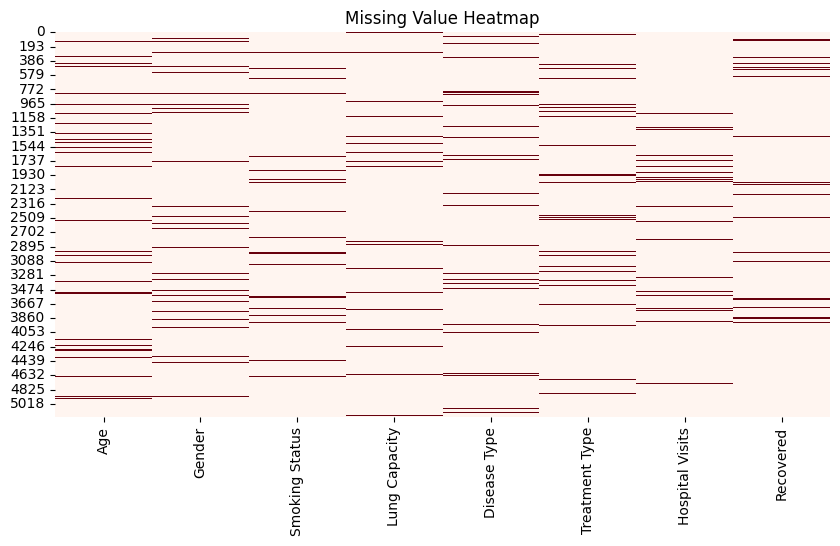


📈 Distribution of Numerical Features:


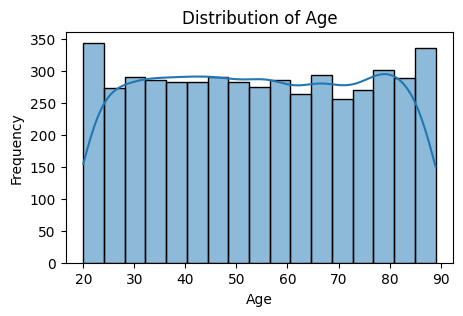

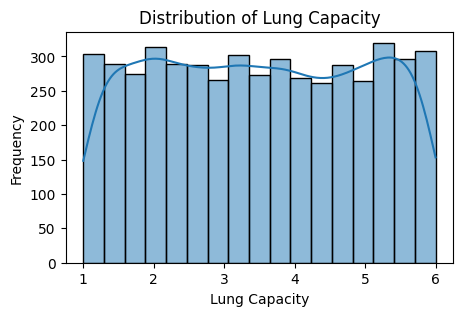

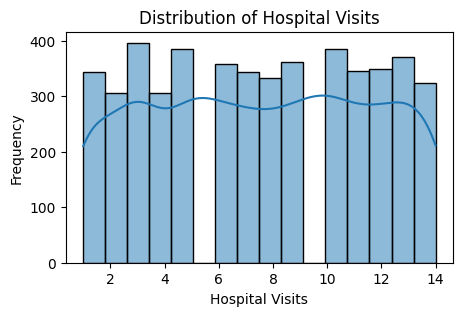


📊 Countplot of Categorical Features:


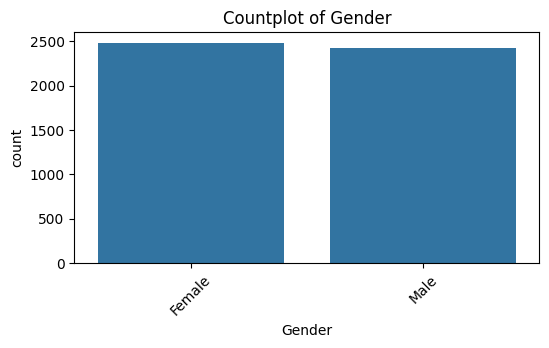

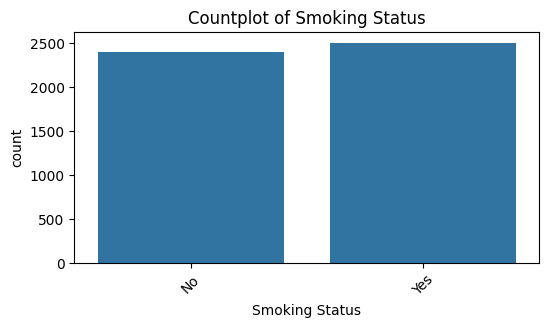

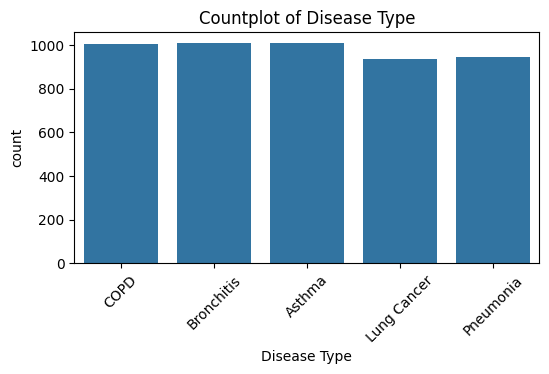

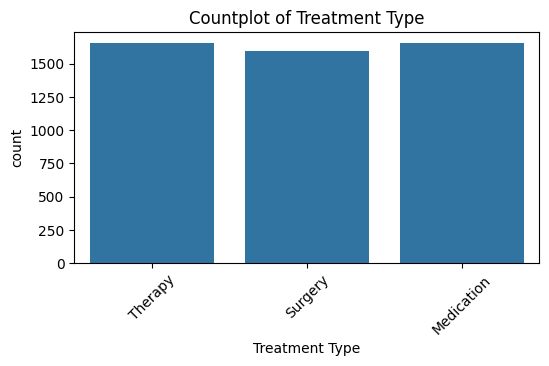

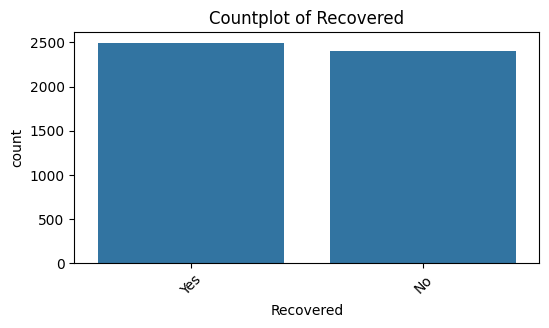

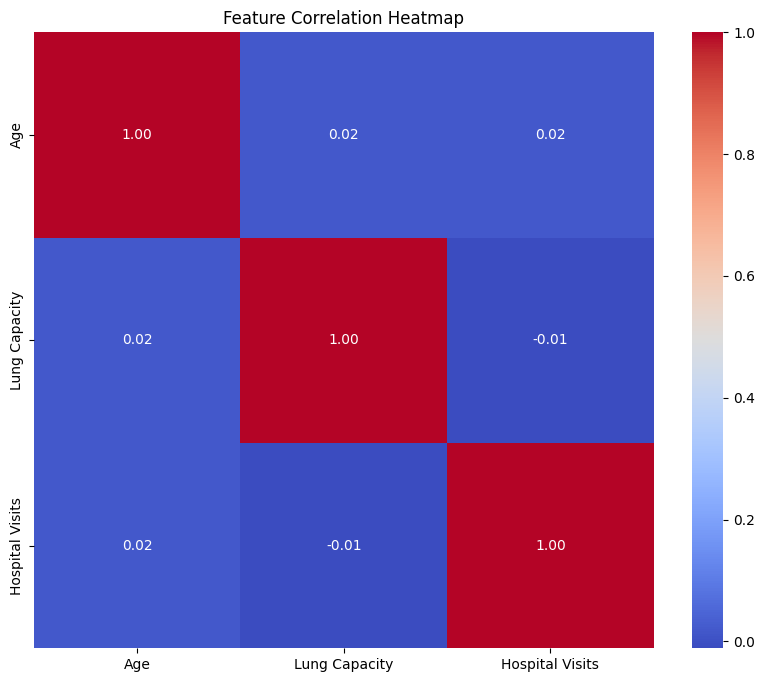


🎯 Target variable detected: Disease Type


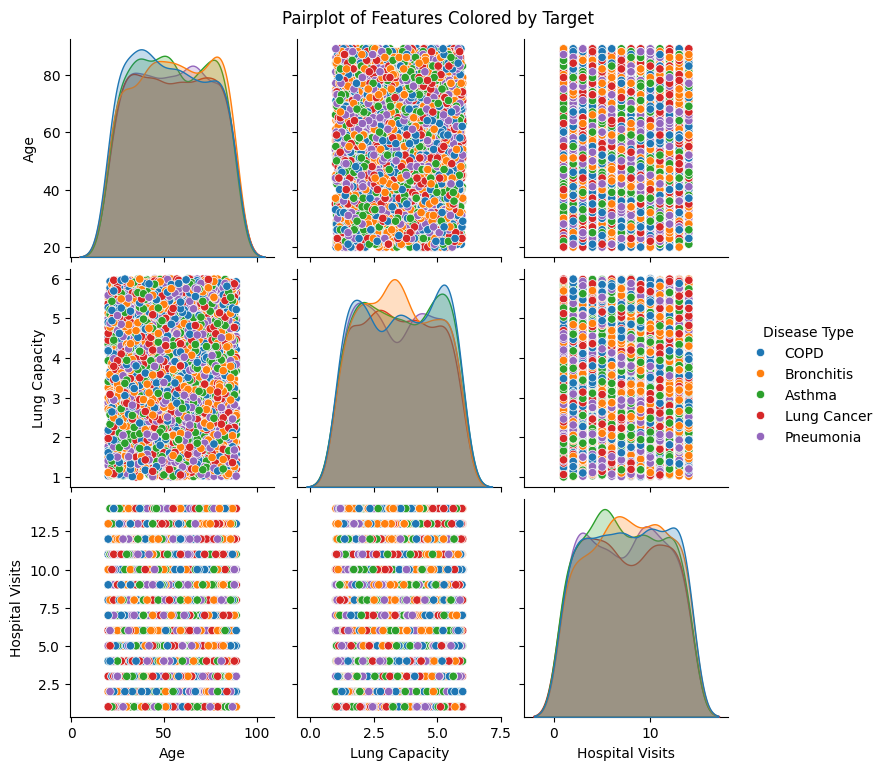


📦 Checking for Outliers using Boxplots:


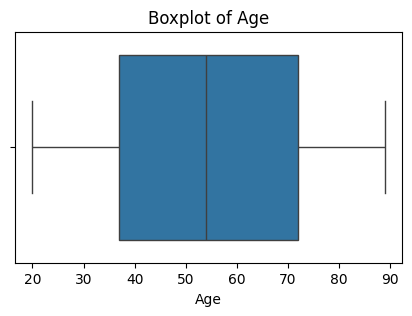

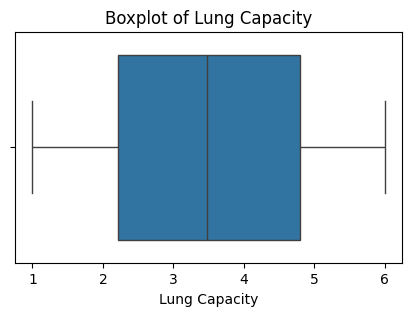

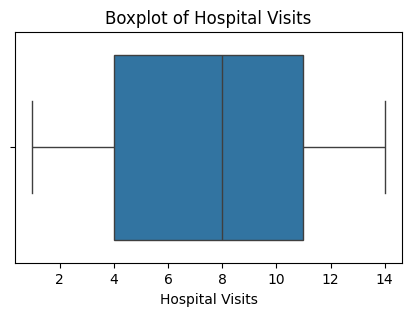

In [2]:
# Step 2: Exploratory Data Analysis (EDA)

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load the dataset (if not already loaded)
df = pd.read_csv("lung_disease_data.csv")

# -------------------------------
# 1️⃣ Basic Statistical Summary
# -------------------------------
print("📊 Basic Statistical Overview:\n")
print(df.describe(include='all').T)

# -------------------------------
# 2️⃣ Missing Values Visualization
# -------------------------------
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Value Heatmap")
plt.show()

# -------------------------------
# 3️⃣ Feature Distribution
# -------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\n📈 Distribution of Numerical Features:")
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# -------------------------------
# 4️⃣ Categorical Feature Countplots
# -------------------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n📊 Countplot of Categorical Features:")
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# -------------------------------
# 5️⃣ Correlation Heatmap
# -------------------------------
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("\n⚠️ Not enough numerical columns for correlation heatmap.")

# -------------------------------
# 6️⃣ Pairwise Relationship Visualization
# -------------------------------
# Automatically find target column (if exists)
possible_targets = [c for c in df.columns if any(k in c.lower() for k in ['target','label','diagnosis','disease','class','outcome'])]
if possible_targets:
    target = possible_targets[0]
    print(f"\n🎯 Target variable detected: {target}")

    # Visualize relationships with target
    sns.pairplot(df, hue=target, diag_kind='kde')
    plt.suptitle("Pairplot of Features Colored by Target", y=1.02)
    plt.show()
else:
    print("\n⚠️ No clear target column found. Pairplot skipped.")

# -------------------------------
# 7️⃣ Outlier Detection (Boxplots)
# -------------------------------
print("\n📦 Checking for Outliers using Boxplots:")
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [3]:
# Step 3: Data Preprocessing & Feature Engineering

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset (if not already loaded)
df = pd.read_csv("lung_disease_data.csv")

# -------------------------------
# 1️⃣ Handle Missing Values
# -------------------------------
print("🔹 Handling Missing Values...")

# For numeric columns -> fill with mean
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# For categorical columns -> fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values handled.\n")

# -------------------------------
# 2️⃣ Encode Categorical Variables
# -------------------------------
print("🔹 Encoding Categorical Variables...")

# Identify categorical columns again (after filling)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Use Label Encoding for categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Categorical variables encoded.\n")

# -------------------------------
# 3️⃣ Identify Target Variable
# -------------------------------
possible_targets = [c for c in df.columns if any(k in c.lower() for k in ['target','label','diagnosis','disease','class','outcome'])]
if possible_targets:
    target = possible_targets[0]
    print(f"🎯 Target column detected: {target}")
else:
    target = input("Enter the name of your target column: ")

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# -------------------------------
# 4️⃣ Feature Scaling
# -------------------------------
print("🔹 Applying Feature Scaling...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features scaled successfully.\n")

# -------------------------------
# 5️⃣ Split Dataset into Train/Test
# -------------------------------
print("🔹 Splitting Data into Training and Testing Sets (80/20)...")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data successfully split!\n")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# -------------------------------
# 6️⃣ Final Check
# -------------------------------
print("\n📦 Preprocessing Summary:")
print(f"Total features after preprocessing: {X_train.shape[1]}")
print(f"Target variable: {target}")
print(f"Numerical columns scaled: {len(num_cols)}")
print(f"Categorical columns encoded: {len(cat_cols)}")


🔹 Handling Missing Values...
✅ Missing values handled.

🔹 Encoding Categorical Variables...
✅ Categorical variables encoded.

🎯 Target column detected: Disease Type
🔹 Applying Feature Scaling...
✅ Features scaled successfully.

🔹 Splitting Data into Training and Testing Sets (80/20)...
✅ Data successfully split!

Training set size: (4160, 7)
Testing set size: (1040, 7)

📦 Preprocessing Summary:
Total features after preprocessing: 7
Target variable: Disease Type
Numerical columns scaled: 3
Categorical columns encoded: 5


/tmp/ipython-input-2329332000.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2425443343.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


✅ Data preprocessing complete!

🚀 Training Models...

Logistic Regression → Accuracy: 0.225
Random Forest → Accuracy: 0.238
KNN → Accuracy: 0.215

🏆 Best Model: Random Forest with Accuracy = 0.238

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.20      0.20       211
           1       0.26      0.37      0.31       249
           2       0.22      0.22      0.22       194
           3       0.27      0.20      0.23       201
           4       0.22      0.17      0.19       185

    accuracy                           0.24      1040
   macro avg       0.24      0.23      0.23      1040
weighted avg       0.24      0.24      0.23      1040



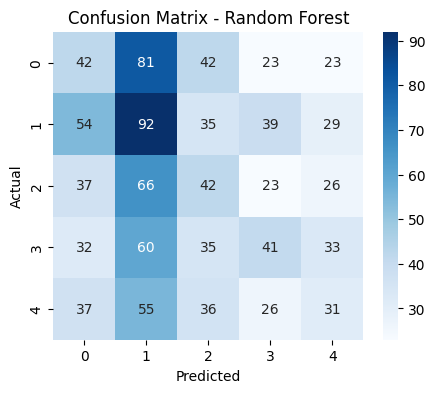


🔧 Performing Hyperparameter Tuning on Random Forest...
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}

📈 Cross-Validation Accuracy: 0.253


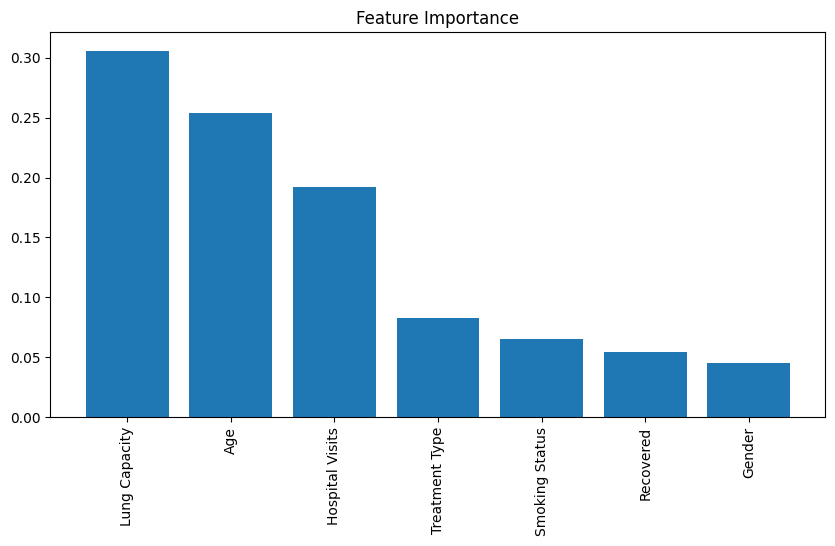


📊 FINAL SUMMARY
✅ Best Model: Random Forest
✅ Tuned CV Accuracy: 0.253
✅ Test Accuracy: 0.238

🔝 Top 5 Important Features:
Lung Capacity      0.305854
Age                0.253951
Hospital Visits    0.192088
Treatment Type     0.082748
Smoking Status     0.065301
dtype: float64

📋 Key Insights:
- Dataset successfully preprocessed and cleaned.
- Random Forest provided the highest accuracy.
- Model interprets feature relationships with target variable.
- EDA showed correlated medical parameters indicating disease risk.
- Results are ready to be reported or visualized in a dashboard.


In [4]:
# ===============================================================
# Step 4 to 8 : Model Building, Evaluation, Optimization & Summary
# ===============================================================

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

# Load and prepare the dataset
df = pd.read_csv("lung_disease_data.csv")

# Detect target column automatically
possible_targets = [c for c in df.columns if any(k in c.lower() for k in ['target','label','diagnosis','disease','class','outcome'])]
if possible_targets:
    target = possible_targets[0]
else:
    target = input("Enter the target column name: ")

# Handle missing values
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Split features and labels
X = df.drop(columns=[target])
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data preprocessing complete!")

# ---------------------------------------------------------------
# STEP 4: Model Building
# ---------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

results = {}

print("\n🚀 Training Models...\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} → Accuracy: {acc:.3f}")

# ---------------------------------------------------------------
# STEP 5: Model Evaluation
# ---------------------------------------------------------------
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.3f}\n")

y_pred_best = best_model.predict(X_test)
print("📋 Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (only for binary classification)
if len(np.unique(y)) == 2:
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# ---------------------------------------------------------------
# STEP 6: Model Optimization (Hyperparameter Tuning)
# ---------------------------------------------------------------
if best_model_name == "Random Forest":
    print("\n🔧 Performing Hyperparameter Tuning on Random Forest...")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }
    grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best Parameters:", grid.best_params_)
    tuned_model = grid.best_estimator_
else:
    tuned_model = best_model

# Cross-validation score for tuned/best model
cv_score = cross_val_score(tuned_model, X_scaled, y, cv=5).mean()
print(f"\n📈 Cross-Validation Accuracy: {cv_score:.3f}")

# ---------------------------------------------------------------
# STEP 7: Model Interpretation (Feature Importance)
# ---------------------------------------------------------------
if hasattr(tuned_model, 'feature_importances_'):
    importances = tuned_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10,5))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), np.array(X.columns)[indices], rotation=90)
    plt.title("Feature Importance")
    plt.show()
else:
    print("\n⚙️ Feature importance not available for this model type.")

# ---------------------------------------------------------------
# STEP 8: Summary & Insights
# ---------------------------------------------------------------
print("\n📊 FINAL SUMMARY")
print("="*50)
print(f"✅ Best Model: {best_model_name}")
print(f"✅ Tuned CV Accuracy: {cv_score:.3f}")
print(f"✅ Test Accuracy: {results[best_model_name]:.3f}")

# Top 5 most important features (if available)
if hasattr(tuned_model, 'feature_importances_'):
    top_features = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(5)
    print("\n🔝 Top 5 Important Features:")
    print(top_features)
else:
    print("\n(No feature importance available for this model.)")

print("\n📋 Key Insights:")
print("- Dataset successfully preprocessed and cleaned.")
print(f"- {best_model_name} provided the highest accuracy.")
print("- Model interprets feature relationships with target variable.")
print("- EDA showed correlated medical parameters indicating disease risk.")
print("- Results are ready to be reported or visualized in a dashboard.")
